In [4]:
import numpy as np  # for numerical operations
import pandas as pd  # for dataset operations
import matplotlib.pyplot as plt # for plotting

In [18]:
df = pd.read_csv("http://jse.amstat.org/v19n3/decock/AmesHousing.txt", sep='\t')
df = df[['Year Built','Gr Liv Area','Overall Qual','Neighborhood','Foundation','TotRms AbvGrd','Full Bath', 'Bedroom AbvGr','SalePrice']]
df.columns = ['Year Built','House Area (sqft)','Quality of Build','Neighborhood','Foundation Type','Total Rooms','Bathrooms','Bedrooms','SalePrice']

In [6]:
df.head()

,Year Built,House Area (sqft),Quality of Build,Neighborhood,Foundation Type,Total Rooms,Bathrooms,Bedrooms,SalePrice
0,1960,1656,6,NAmes,CBlock,7,1,3,215000
1,1961,896,5,NAmes,CBlock,5,1,2,105000
2,1958,1329,6,NAmes,CBlock,6,1,3,172000
3,1968,2110,7,NAmes,CBlock,8,2,3,244000
4,1997,1629,5,Gilbert,PConc,6,2,3,189900


In [7]:
df.shape

(2930, 9)

In [8]:
df.describe()

,Year Built,House Area (sqft),Quality of Build,Total Rooms,Bathrooms,Bedrooms,SalePrice
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1971.356314,1499.690444,6.094881,6.443003,1.566553,2.854266,180796.060068
std,30.245361,505.508887,1.411026,1.572964,0.552941,0.827731,79886.692357
min,1872.000000,334.000000,1.000000,2.000000,0.000000,0.000000,12789.000000
25%,1954.000000,1126.000000,5.000000,5.000000,1.000000,2.000000,129500.000000
50%,1973.000000,1442.000000,6.000000,6.000000,2.000000,3.000000,160000.000000
75%,2001.000000,1742.750000,7.000000,7.000000,2.000000,3.000000,213500.000000
max,2010.000000,5642.000000,10.000000,15.000000,4.000000,8.000000,755000.000000


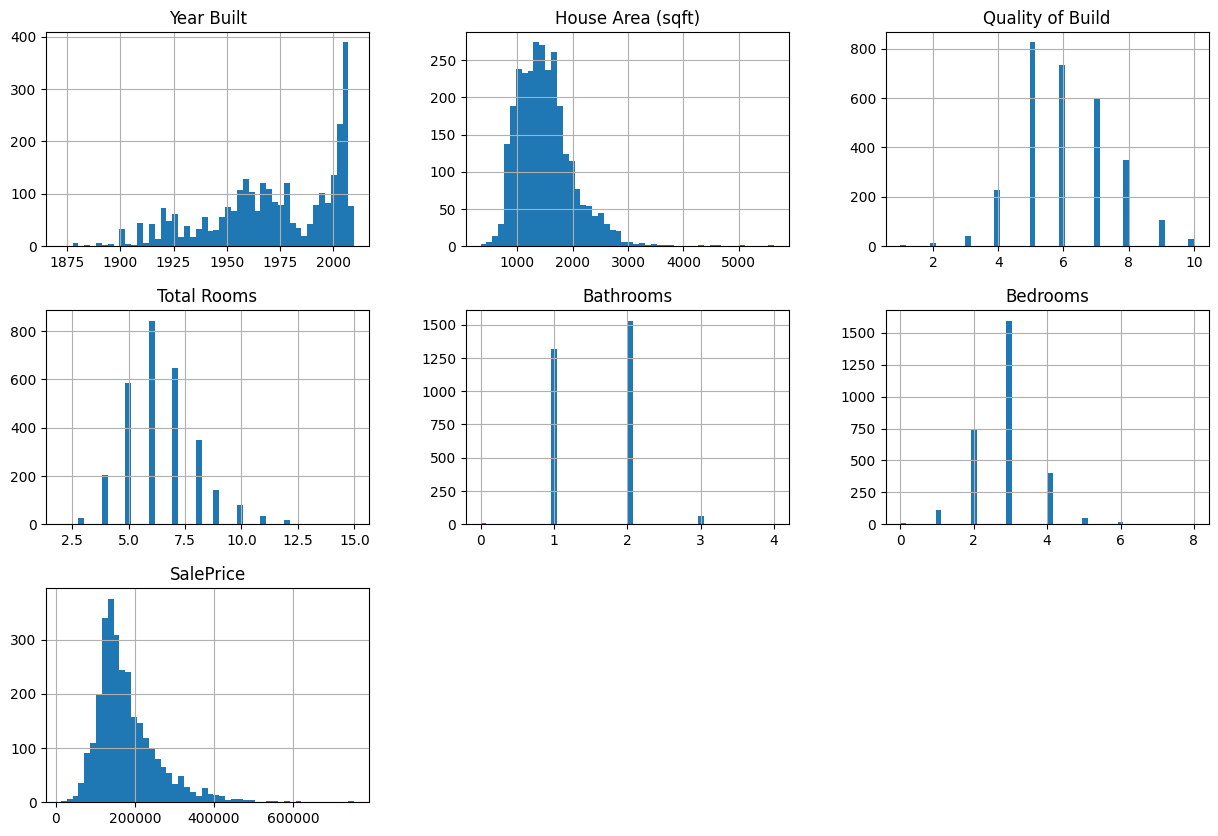

In [9]:
df.hist(bins=50, figsize=(15,10))
plt.show()

In [10]:
# value counts for neighborhood
print('Number of homes from each neighborhood')
df['Neighborhood'].value_counts()

Number of homes from each neighborhood


Neighborhood
NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Greens       8
GrnHill      2
Landmrk      1
Name: count, dtype: int64

In [11]:
# value counts for neighborhood
print('Types of foundations (material = cynder block, poured concrete, brick, slab, stone, or wood)')
df['Foundation Type'].value_counts()

Types of foundations (material = cynder block, poured concrete, brick, slab, stone, or wood)


Foundation Type
PConc     1310
CBlock    1244
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: count, dtype: int64

<Axes: xlabel='Neighborhood'>

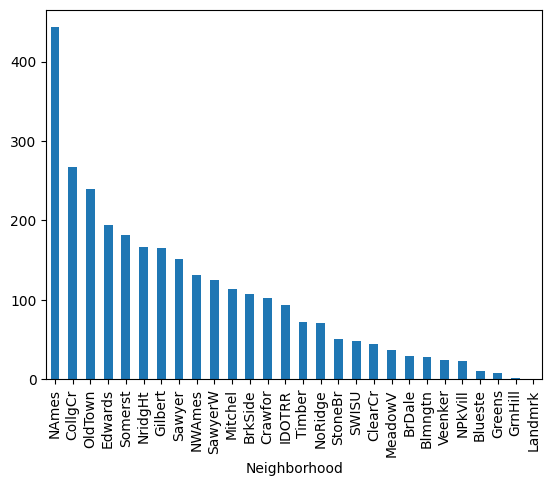

In [12]:
# Barplot for neighborhood
df['Neighborhood'].value_counts().plot(kind='bar')

<Axes: xlabel='Foundation Type'>

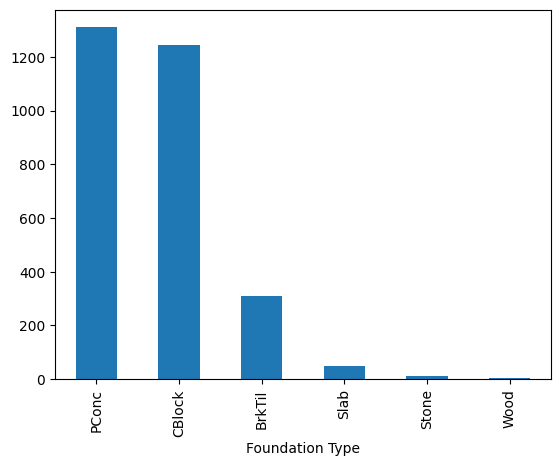

In [13]:
# Barplot for foundation type
df['Foundation Type'].value_counts().plot(kind='bar')

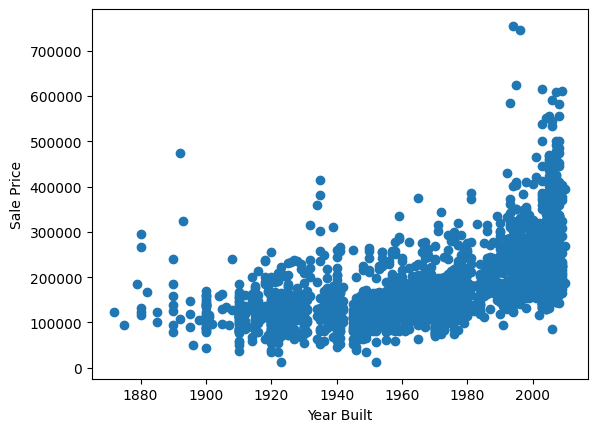

In [14]:
# scatterplot showing year built and sale price
plt.scatter(df['Year Built'], df['SalePrice'])
plt.xlabel('Year Built')
plt.ylabel('Sale Price')
plt.show()

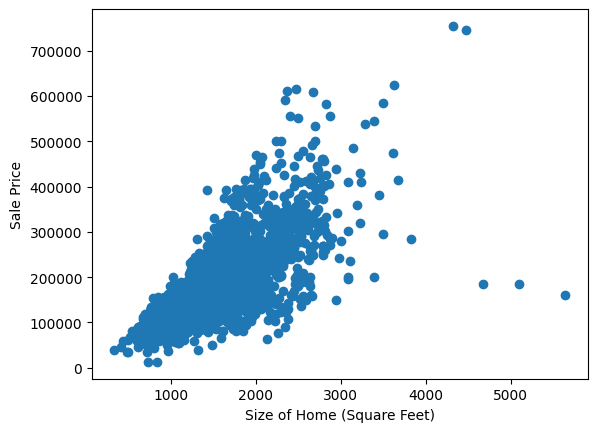

In [15]:
# scatterplot showing lot size and price
plt.scatter(df['House Area (sqft)'], df['SalePrice'])
plt.xlabel('Size of Home (Square Feet)')
plt.ylabel('Sale Price')
plt.show()

Simple Linear Regression

In [16]:
# separate into x and y variables
X = np.array(df['House Area (sqft)']).reshape(-1, 1) #reshaping will help our model fitting
y = np.array(df['SalePrice']).reshape(-1, 1) #reshaping will help our model fitting

In [17]:
# import linear regression model, from sklearn
from sklearn.linear_model import LinearRegression
lm = LinearRegression() # builds up model package
lm.fit(X, y) # trains model using training x and y

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# shows fitted coefficients
print('Intercept: ', lm.intercept_)
print('Slope: ',lm.coef_)

Intercept:  [13289.63436476]
Slope:  [[111.69400086]]


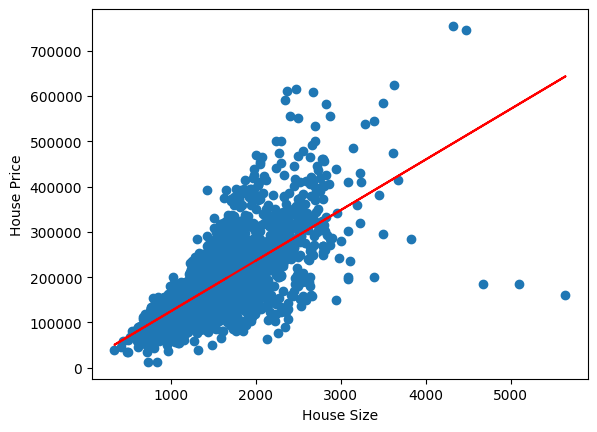

In [ ]:
plt.scatter(X, y)
plt.plot(X, lm.predict(X), 'r')
plt.xlabel('House Size')
plt.ylabel('House Price')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error
simple_model_MSE = mean_squared_error(y,lm.predict(X))
simple_model_MSE

3192801087.3860455